In [12]:
## Range of times for K2-19b at MC Donald
import ktwo19.io

In [13]:
df = pd.read_table('data/201505350b_McDonald.dat',skiprows=1,names=['t','f','f_err'])
start = df.iloc[0]['t']
stop = df.iloc[-1]['t']
mid = 0.5*(start+stop)
err = 0.5*(stop-start)
print "LCO McDonald Photometry start={:.6f} stop={:.6f}".format(start,stop)
t0 = 2456813.38403
per = -2456813.38403 + 2456821.30421
(2457858.75647 - t0)/per

LCO McDonald Photometry start=2457858.635390 stop=2457858.877540


131.98846995294525

In [14]:
0.5 *(2457850.070 + 2457850.090)

2457850.08

In [15]:
0.5*(2457852.156379+2457853.268647 )

2457852.712513

In [16]:
planets = pd.read_excel('./observations/wircpol/WIRCPOL Transit Observations.xlsx',skiprows=[0])
planets.index=planets.name
planets.ix[['K2-19b','K2-19c']]

,name,kmag,P,T0,T14 [hrs],rprstar,tau,phot_prec,depth,depth_prec,TC_prec
name,,,,,,,,,,,
K2-19b,K2-19b,11.16,7.91952,1980.38319,3.237,7.446,0.24,548,5544,39.30,0.27
K2-19c,K2-19c,11.16,11.90724,1984.27545,3.823,4.440,0.17,548,1971,36.16,0.63


Populating the interactive namespace from numpy and matplotlib


/Users/petigura/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


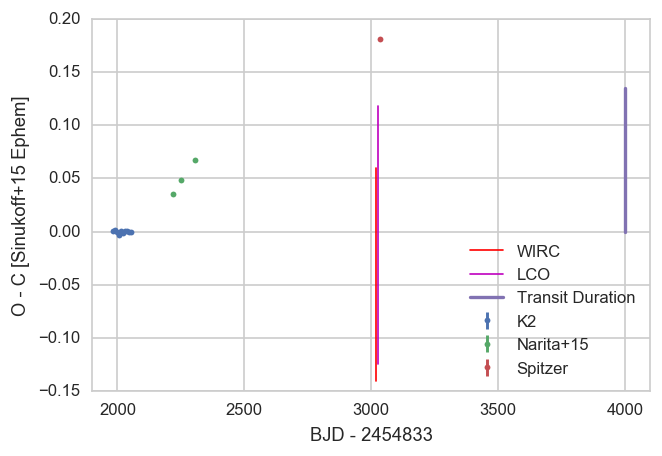

In [38]:
%pylab inline
import seaborn as sns
sns.set_style('whitegrid')
times = ktwo19.io.load_times()
times.index = times.i_planet
times = times.ix[1]
planet = planets.ix['K2-19b']
times['omc'] = times['tc'] - planet.T0 - planet.P * times.i_epoch
rc('savefig',dpi=120)
cut = times.query('inst=="K2"')
errorbar(cut.tc,cut.omc,yerr=cut.tc_err,fmt='.',label='K2')
cut = times[times.notes.str.contains('Narita')]
errorbar(cut.tc,cut.omc,yerr=cut.tc_err,fmt='.',label='Narita+15')

cut = times[times.notes.str.contains('Spitzer')]
errorbar(cut.tc,cut.omc,yerr=cut.tc_err,fmt='.',label='Spitzer')


T14 = planet.ix['T14 [hrs]']/24
cut = times[times.notes.str.contains('Barros')]
cut['tc_err'] += 0.5 * T14
'''
errorbar(cut.tc,cut.omc,yerr=cut.tc_err,fmt=',',label='Barros+15 Pred.')
'''
rng = pd.read_excel('data/transit-times.xlsx',sheetname='Sheet2')
rng.index = rng.i_planet
rng = rng.ix[1]
from ktwo19.io import bjd0
rng['start'] -= bjd0
rng['stop'] -= bjd0
rng['start_omc'] = rng['start'] - planet.T0 - planet.P * rng.i_epoch
rng['stop_omc'] = rng['stop'] - planet.T0 - planet.P * rng.i_epoch

kw = dict(lw=1,ls='-',marker='_',ms=10)
cut = rng[rng.notes.str.contains('WIRC')].iloc[0]
plot([cut.start,cut.start],[cut.start_omc,cut.stop_omc],label='WIRC',color='r',**kw)

#cut = rng[rng.notes.str.contains('Spitzer')].iloc[0]
#plot([cut.start,cut.start],[cut.start_omc,cut.stop_omc],label='Spitzer',color='b',**kw)

cut = rng[rng.notes.str.contains('LCO')].iloc[0]
plot([cut.start,cut.start],[cut.start_omc,cut.stop_omc],label='LCO',color='m',**kw)


plot([4e3,4e3],[0,T14],lw=2,label='Transit Duration')
xlim(1900,4100)
#xlim(2700,3300)

legend(loc='lower right')
xlabel('BJD - %i' % bjd0)
ylabel('O - C [Sinukoff+15 Ephem]')
gcf().savefig('fig_K2-19-Observations.pdf') 

Populating the interactive namespace from numpy and matplotlib


/Users/petigura/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


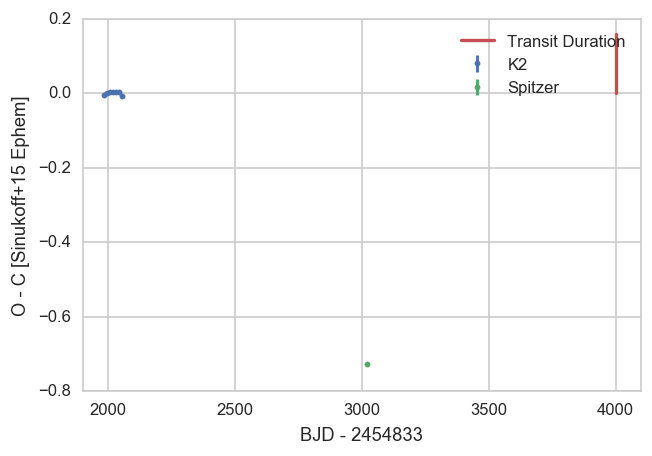

In [36]:
%pylab inline
import seaborn as sns
sns.set_style('whitegrid')
times = ktwo19.io.load_times()
times.index = times.i_planet
times = times.ix[2]
planet = planets.ix['K2-19c']
times['omc'] = times['tc'] - planet.T0 - planet.P * times.i_epoch
rc('savefig',dpi=120)
cut = times.query('inst=="K2"')
errorbar(cut.tc,cut.omc,yerr=cut.tc_err,fmt='.',label='K2')

#cut = times[times.notes.str.contains('Narita')]
#errorbar(cut.tc,cut.omc,yerr=cut.tc_err,fmt='.',label='Narita+15')

cut = times[times.notes.str.contains('Spitzer')]
errorbar(cut.tc,cut.omc,yerr=cut.tc_err,fmt='.',label='Spitzer')


T14 = planet.ix['T14 [hrs]']/24
cut = times[times.notes.str.contains('Barros')]
cut['tc_err'] += 0.5 * T14

'''
errorbar(cut.tc,cut.omc,yerr=cut.tc_err,fmt=',',label='Barros+15 Pred.')
'''

rng = pd.read_excel('data/transit-times.xlsx',sheetname='Sheet2')
rng.index = rng.i_planet
rng = rng.ix[[2]]
from ktwo19.io import bjd0
rng['start'] -= bjd0
rng['stop'] -= bjd0
rng['start_omc'] = rng['start'] - planet.T0 - planet.P * rng.i_epoch
rng['stop_omc'] = rng['stop'] - planet.T0 - planet.P * rng.i_epoch

kw = dict(lw=1,ls='-',marker='_',ms=10)

#cut = rng[rng.notes.str.contains('Spitzer')].iloc[0]
#plot([cut.start,cut.start],[cut.start_omc,cut.stop_omc],label='Spitzer',color='b',**kw)


plot([4e3,4e3],[0,T14],lw=2,label='Transit Duration')
xlim(1900,4100)
#xlim(2700,3300)
plt.legend()

xlabel('BJD - %i' % bjd0)
ylabel('O - C [Sinukoff+15 Ephem]')
gcf().savefig('fig_K2-19-Observations.pdf') 

In [28]:
debug

> /Users/petigura/anaconda/lib/python2.7/site-packages/matplotlib/legend_handler.py(477)create_artists()
    475                       for x, y in zip(xdata_marker, ydata_marker)]
    476             coll = mcoll.LineCollection(verts)
--> 477             self.update_prop(coll, barlinecols[0], legend)
    478             handle_barlinecols.append(coll)
    479 

ipdb> up
> /Users/petigura/anaconda/lib/python2.7/site-packages/matplotlib/legend_handler.py(119)legend_artist()
    117         artists = self.create_artists(legend, orig_handle,
    118                                       xdescent, ydescent, width, height,
--> 119                                       fontsize, handlebox.get_transform())
    120 
    121         # create_artists will return a list of artists.

ipdb> 
> /Users/petigura/anaconda/lib/python2.7/site-packages/matplotlib/legend.py(654)_init_legend_box()
    652                 # original artist/handle.
    653                 handle_list.append(handler.legend_arti

In [173]:
rng = pd.read_excel('data/transit-times.xlsx',sheetname='Sheet2')
rng.index = rng.i_planet
rng = rng.ix[2]
rng

i_planet                   2
i_epoch                   87
start            2.45785e+06
stop             2.45785e+06
Unnamed: 4               NaN
notes         Spitzer K2-19c
Name: 2, dtype: object